In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
data = pd.read_csv('Dentistry Dataset.csv')  # Replace with your file path

# Preview the dataset
print(data.head())
print(data.info())

# Check for missing values
print(data.isnull().sum())


   Sl No  Sample ID  Age  Gender  inter canine distance intraoral  \
0      1        NaN   24  Female                            25.06   
1      2        NaN   22  Female                            25.78   
2      3        NaN   23  Female                            23.83   
3      4        NaN   20  Female                            26.12   
4      5        NaN   20  Female                            26.36   

   intercanine distance casts  right canine width intraoral  \
0                       25.05                          6.08   
1                       25.79                          6.13   
2                       23.83                          5.91   
3                       26.12                          6.08   
4                       26.41                          6.09   

   right canine width casts  left canine width intraoral  \
0                      6.08                         6.09   
1                      6.13                         6.33   
2                      5.9

In [4]:


# Fill missing values with mean for numeric columns only
numeric_columns = data.select_dtypes(include=np.number).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [5]:
# Convert Gender (categorical) to numerical values
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Male=1, Female=0


In [6]:
# Separate features and labels
X = data.drop('Gender', axis=1)  # Features
y = data['Gender']               # Target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [7]:
# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (880, 13)
Testing data shape: (220, 13)


In [8]:
# Initialize Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [9]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[112   1]
 [  6 101]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       113
           1       0.99      0.94      0.97       107

    accuracy                           0.97       220
   macro avg       0.97      0.97      0.97       220
weighted avg       0.97      0.97      0.97       220


Accuracy Score:
0.9681818181818181


In [10]:
import joblib

# Save the model
joblib.dump(model, 'dental_gender_model.pkl')

# To load later:
# model = joblib.load('dental_gender_model.pkl')


['dental_gender_model.pkl']

In [11]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
# Replace 'your_dataset.csv' with the actual dataset path
data = pd.read_csv('Dentistry Dataset.csv')

# Display Data Overview
print(data.head())
print(data.info())

# Preprocessing
# Encode Gender (Target Variable)
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Male =


   Sl No  Sample ID  Age  Gender  inter canine distance intraoral  \
0      1        NaN   24  Female                            25.06   
1      2        NaN   22  Female                            25.78   
2      3        NaN   23  Female                            23.83   
3      4        NaN   20  Female                            26.12   
4      5        NaN   20  Female                            26.36   

   intercanine distance casts  right canine width intraoral  \
0                       25.05                          6.08   
1                       25.79                          6.13   
2                       23.83                          5.91   
3                       26.12                          6.08   
4                       26.41                          6.09   

   right canine width casts  left canine width intraoral  \
0                      6.08                         6.09   
1                      6.13                         6.33   
2                      5.9

   Sl No  Sample ID  Age  Gender  inter canine distance intraoral  \
0      1        NaN   24  Female                            25.06   
1      2        NaN   22  Female                            25.78   
2      3        NaN   23  Female                            23.83   
3      4        NaN   20  Female                            26.12   
4      5        NaN   20  Female                            26.36   

   intercanine distance casts  right canine width intraoral  \
0                       25.05                          6.08   
1                       25.79                          6.13   
2                       23.83                          5.91   
3                       26.12                          6.08   
4                       26.41                          6.09   

   right canine width casts  left canine width intraoral  \
0                      6.08                         6.09   
1                      6.13                         6.33   
2                      5.9

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Confusion Matrix:
[[112   1]
 [  6 101]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       113
           1       0.99      0.94      0.97       107

    accuracy                           0.97       220
   macro avg       0.97      0.97      0.97       220
weighted avg       0.97      0.97      0.97       220


Accuracy Score:
0.9681818181818181


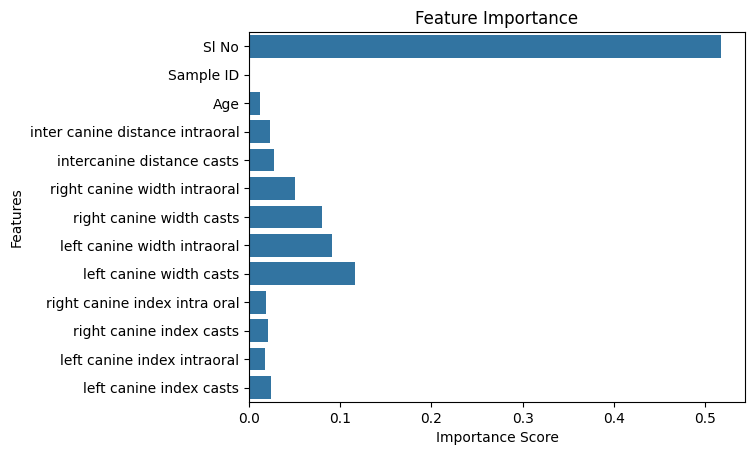

In [12]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Dentistry Dataset.csv')  # Update with your dataset file path

# Explore the dataset
print(data.head())
print(data.info())
print(data.describe())

# Encode gender labels (if categorical)
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Male=1, Female=0

# Separate features and target
X = data.drop('Gender', axis=1)  # Features
y = data['Gender']               # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Feature importance visualization
feature_importances = model.feature_importances_
feature_names = X.columns

# Plot feature importances
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
